In [19]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
from pprint import pprint 
warnings.filterwarnings('ignore')

from pylab import rcParams

%matplotlib inline

# load the data
df = pd.read_csv('Telco-Customer-Churn.csv')

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df.shape

(7043, 21)

## Analysing the Data

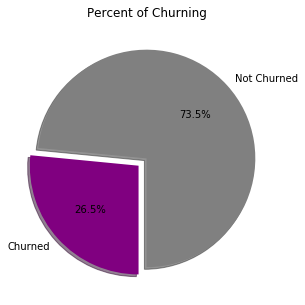

In [24]:
sizes = df['Churn'].value_counts(sort=True)
colors = ["grey","purple"]
rcParams['figure.figsize'] = 5,5
labels = 'Not Churned','Churned'
explode = (0, 0.1)
# Plot 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)

plt.title('Percent of Churning')
plt.show()
    


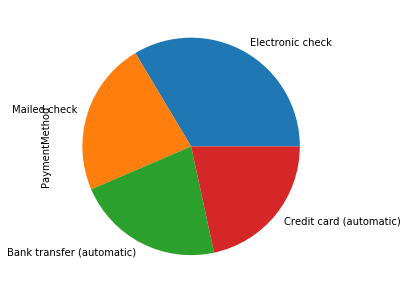

In [25]:
df['PaymentMethod'].value_counts().plot.pie()
plt.gca().set_aspect('equal')

## 

In [28]:
def make_bar_plot(data, show=True, tilted=False, axis=None, desc=None):
    print()
    if not axis:
        fig, axis = plt.subplots(1, 1, figsize=(8, 6))
    else:
        fig = None
    if desc:
        axis.set_title(desc)
    else:
        axis.set_title('"{}" distribution in data'.format(data.name))
    total = float(len(data))

    g = sns.countplot(data, palette='husl', ax=axis, order=sorted(data.unique()), edgecolor='black')

    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
            height*1.02,
            '{:1.2f}%'.format(height/total*100),
            ha='center')
    if tilted:
        axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha='right')
    if show:
        plt.show()
    else:
        if fig:
            plt.close(fig)
            return fig 

def compare_two(feature1, feature2, desc_main, desc1=None, desc2=None, tilted=False):
    fix, ax = plt.subplots(1,2, figsize=(10, 6))
    make_bar_plot(feature1, show=False, tilted=tilted, desc=desc1, axis=ax[0])
    make_bar_plot(feature2, show=False, tilted=tilted, desc=desc2, axis=ax[1])
    fix.suptitle(desc_main)

    plt.show()

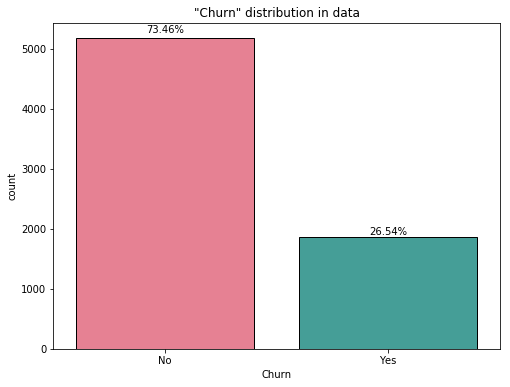

In [33]:
make_bar_plot(df['Churn'], show=False)

## Gender per Churn Status

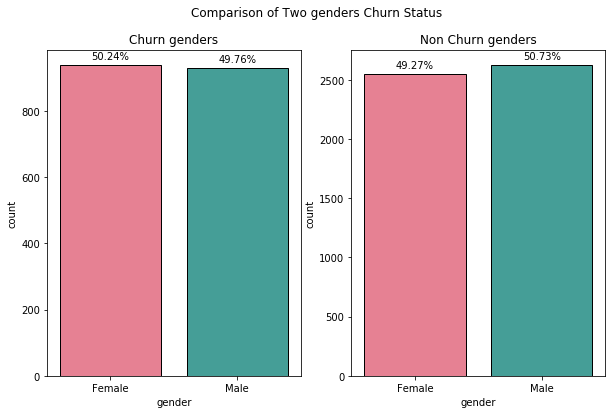

In [34]:
# The distributions look approximately the same 
compare_two(
    df['gender'].loc[df['Churn'] == 'Yes'],
    df['gender'].loc[df['Churn'] == 'No'],
    desc_main = 'Comparison of Two genders Churn Status',
    desc1 = 'Churn genders',
    desc2 = 'Non Churn genders'
)

## Senior citizen per churn status 

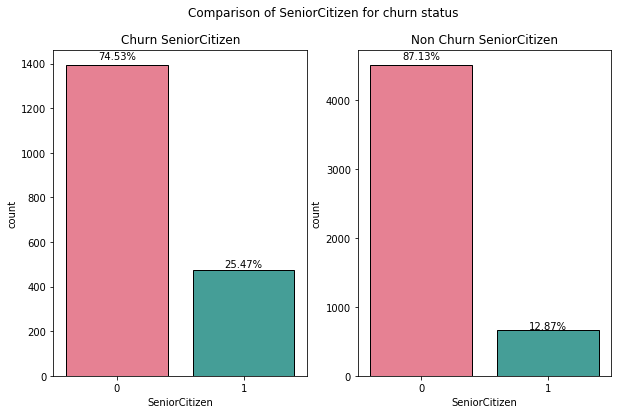

In [35]:
# We have twice as many senior citizens in churn status 
compare_two(df['SeniorCitizen'].loc[df['Churn']=='Yes'], df['SeniorCitizen'].loc[df['Churn']=='No'], desc_main='Comparison of SeniorCitizen for churn status', desc1='Churn SeniorCitizen', desc2='Non Churn SeniorCitizen')

## Partner Per Churn Status

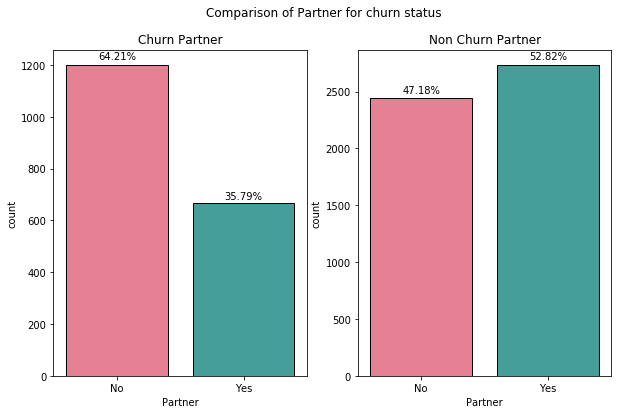

In [31]:
# here we can see that people with churn status have less partners 
compare_two(df['Partner'].loc[df['Churn']=='Yes'], df['Partner'].loc[df['Churn']=='No'], desc_main='Comparison of Partner for churn status', desc1='Churn Partner', desc2='Non Churn Partner')

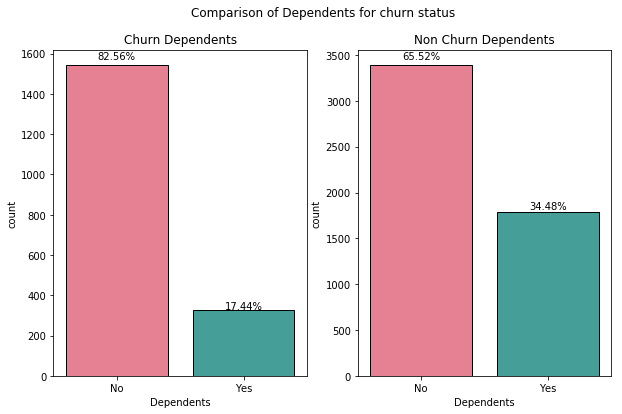

In [36]:
# We can see that people with churn status have less dependents 
compare_two(df['Dependents'].loc[df['Churn']=='Yes'], df['Dependents'].loc[df['Churn']=='No'], desc_main='Comparison of Dependents for churn status', desc1='Churn Dependents', desc2='Non Churn Dependents')

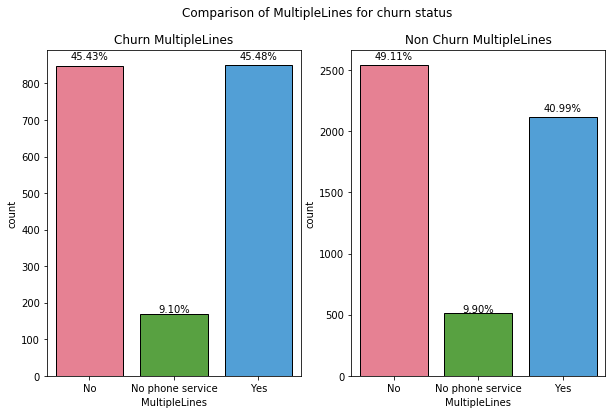

In [37]:
# here we can see that people with Churn status have slightly greater MultipleLines status
compare_two(
    df['MultipleLines'].loc[df['Churn']=='Yes'],
    df['MultipleLines'].loc[df['Churn']=='No'], 
    desc_main='Comparison of MultipleLines for churn status', 
    desc1='Churn MultipleLines', desc2='Non Churn MultipleLines')

## Getting rid of missing values

In [19]:
df.drop(['customerID'], axis=1, inplace=True)

## Convert Numerical Features From Object 